In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import statsd
from functools import reduce
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [152]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [153]:
#fifa data cleaning
df_fifa16 = pd.read_csv('players_16.csv')
df_fifa16['year'] = '15/16'
df_fifa17 = pd.read_csv('players_17.csv')
df_fifa17['year'] = '16/17'
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa18['year'] = '17/18'
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa19['year'] = '18/19'
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa20['year'] = '19/20'

In [154]:
df_fifa16_clean = df_fifa16[['short_name','overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year']]
df_fifa17_clean = df_fifa17[['short_name','overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year']]
df_fifa18_clean = df_fifa18[['short_name','overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year']]
df_fifa19_clean = df_fifa19[['short_name','overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year']]
df_fifa20_clean = df_fifa20[['short_name','overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year']]

In [155]:
data_frames = [df_fifa16_clean, df_fifa17_clean, df_fifa18_clean, df_fifa19_clean, df_fifa20_clean]

In [156]:
df_fifa = df_fifa20_clean.append([df_fifa16_clean, df_fifa17_clean, df_fifa18_clean, df_fifa19_clean])
df_fifa.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year
0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20
1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20
2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20
3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20
4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20


In [157]:
premleagueclubs = ['Arsenal','Aston Villa','Barnsley','Birmingham City','Blackburn Rovers','Blackpool','Bolton Wanderers','Bournemouth','Bradford City','Brighton & Hove Albion','Burnley','Cardiff City','Charlton Athletic','Chelsea','Coventry City','Crystal Palace','Derby County','Everton','Fulham','Huddersfield Town','Hull City','Ipswich Town','Leeds United','Leicester City','Liverpool','Manchester City','Manchester United','Middlesbrough','Newcastle United','Norwich City','Nottingham Forest','Oldham Athletic','Portsmouth','Queens Park','Rangers','Reading','Sheffield United','Sheffield Wednesday','Southampton','Stoke City','Sunderland','Swansea City','Swindon Town','Tottenham Hotspur','Watford','West Bromwich Albion','Wigan Athletic','Wolverhampton Wanderers']

In [158]:
df_fifa_prem = df_fifa[df_fifa['club'].isin(premleagueclubs)]
df_fifa_prem.sort_values(['club', 'overall'], ascending=[True, False]).head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year
11,M. Özil,89,Arsenal,68500000,210000,"CAM, LW",16/17
18,A. Sánchez,89,Arsenal,67500000,265000,"LM, ST, LW, RM",17/18
38,P. Aubameyang,88,Arsenal,57000000,205000,"ST, LM",19/20
22,P. Čech,88,Arsenal,34000000,100000,GK,16/17
27,M. Özil,88,Arsenal,60000000,265000,"CAM, RW",17/18


In [159]:
order_overall = df_fifa_prem.groupby(by=['club'])['overall'].median().sort_values(ascending=False).index
order_value = df_fifa_prem.groupby(by=['club'])['value_eur'].median().sort_values(ascending=False).index



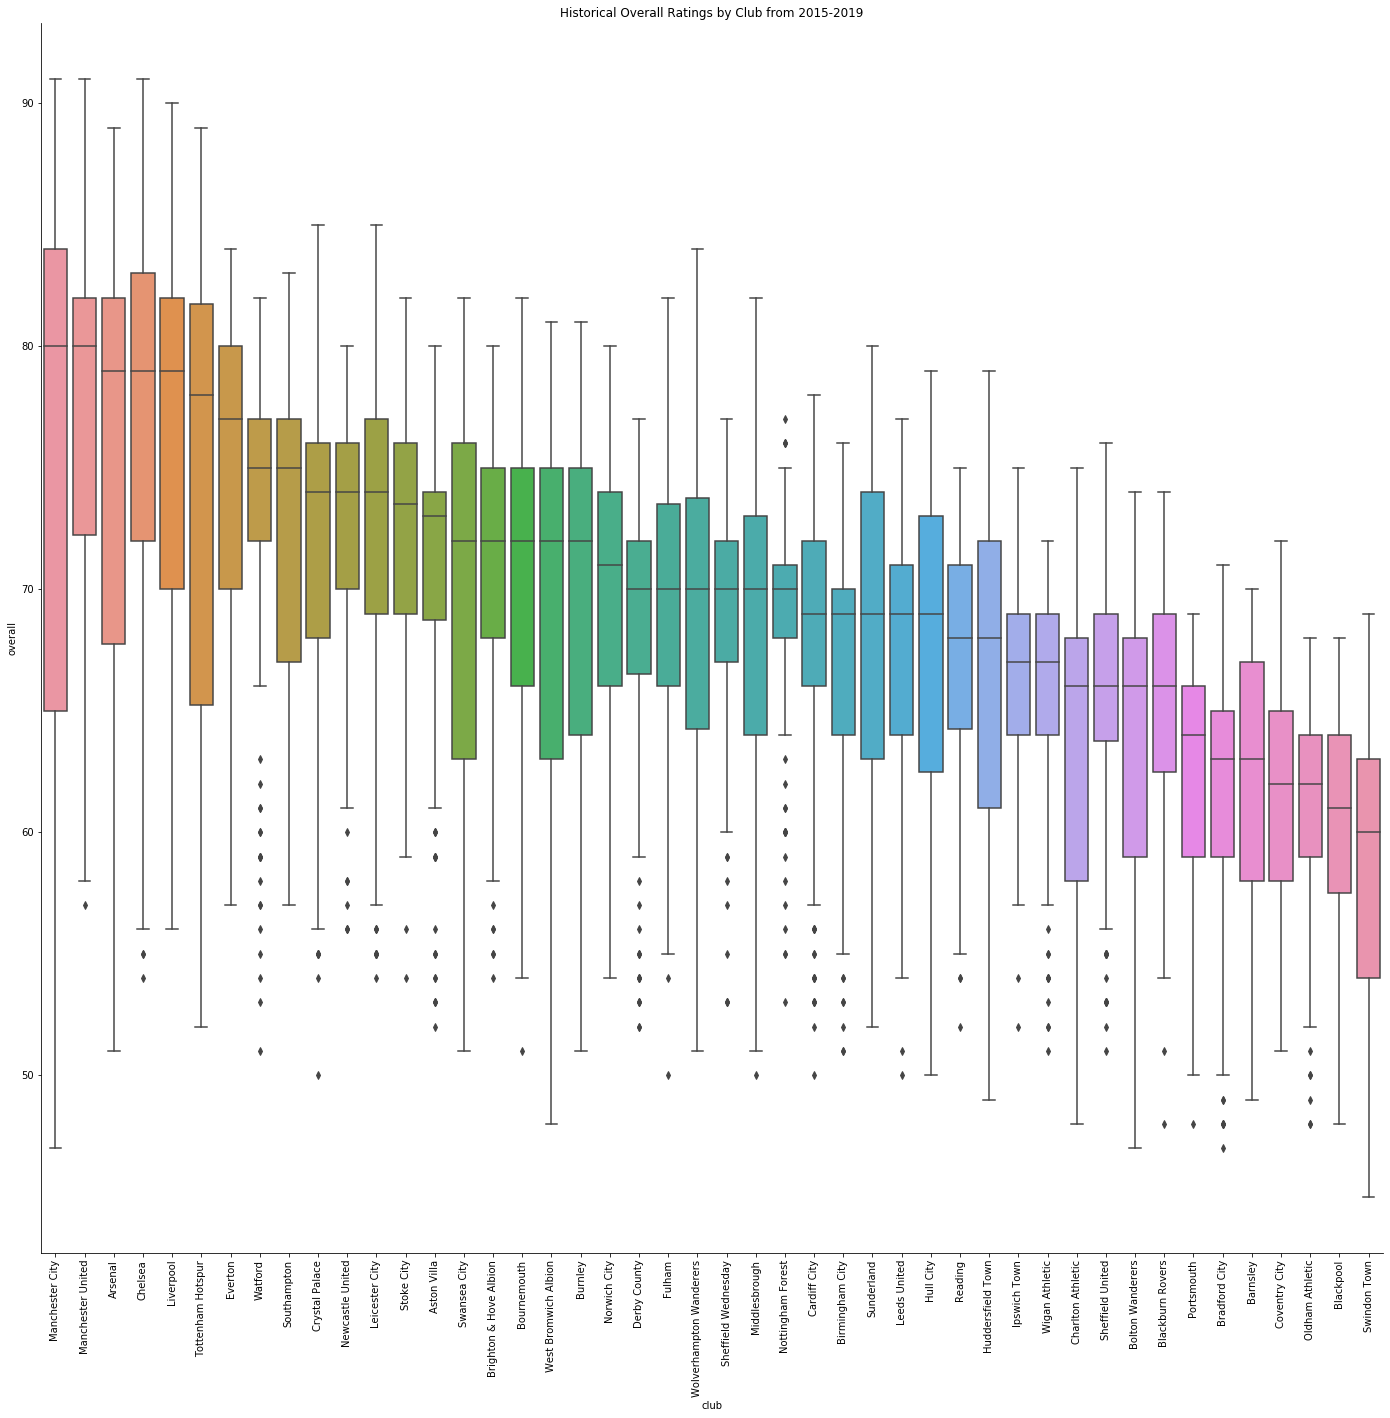

In [161]:
#Historical trends from 
ax=sns.catplot(x="club", y="overall", kind="box", order=order_overall, data=df_fifa_prem)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Historical Overall Ratings by Club from 2015-2019')
plt.show()

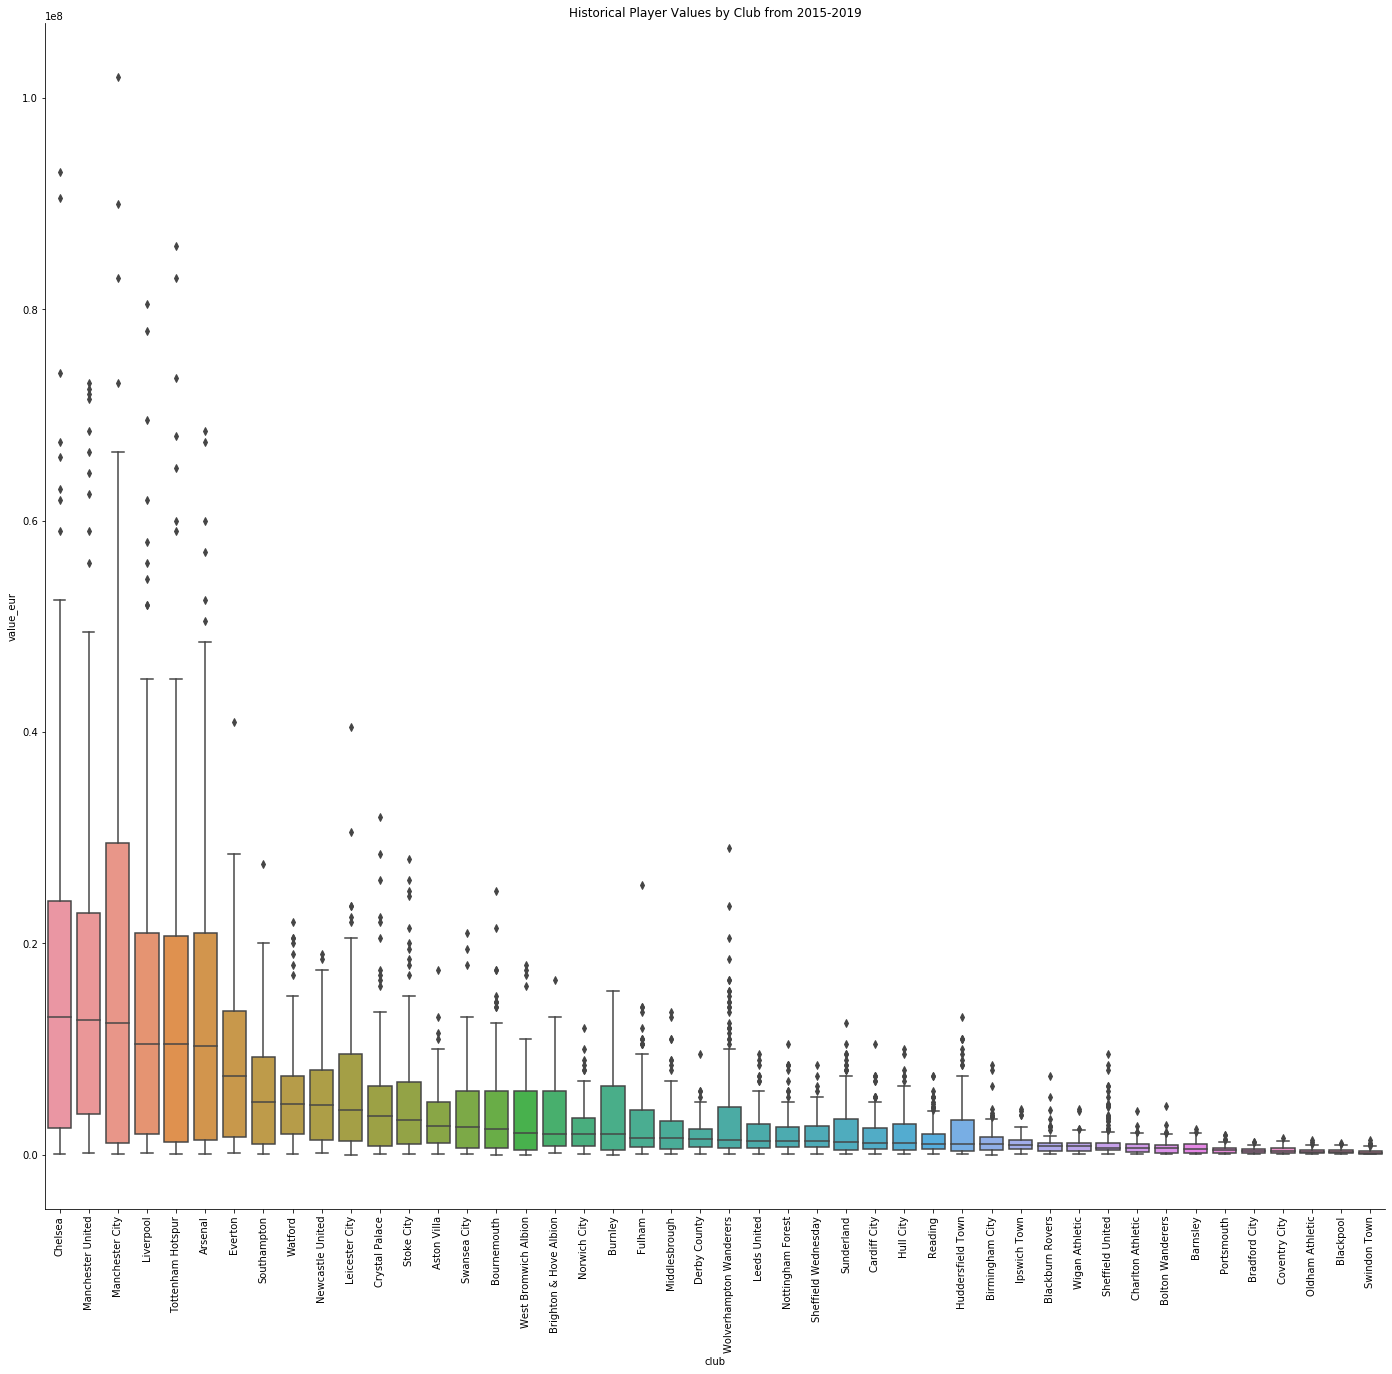

In [162]:
ax=sns.catplot(x="club", y="value_eur", kind="box", order=order_value, data=df_fifa_prem)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Historical Player Values by Club from 2015-2019')
plt.show()

In [164]:
order_overall = df_fifa20_prem.groupby(by=['club'])['overall'].median().sort_values(ascending=False).index
order_value = df_fifa20_prem.groupby(by=['club'])['value_eur'].median().sort_values(ascending=False).index

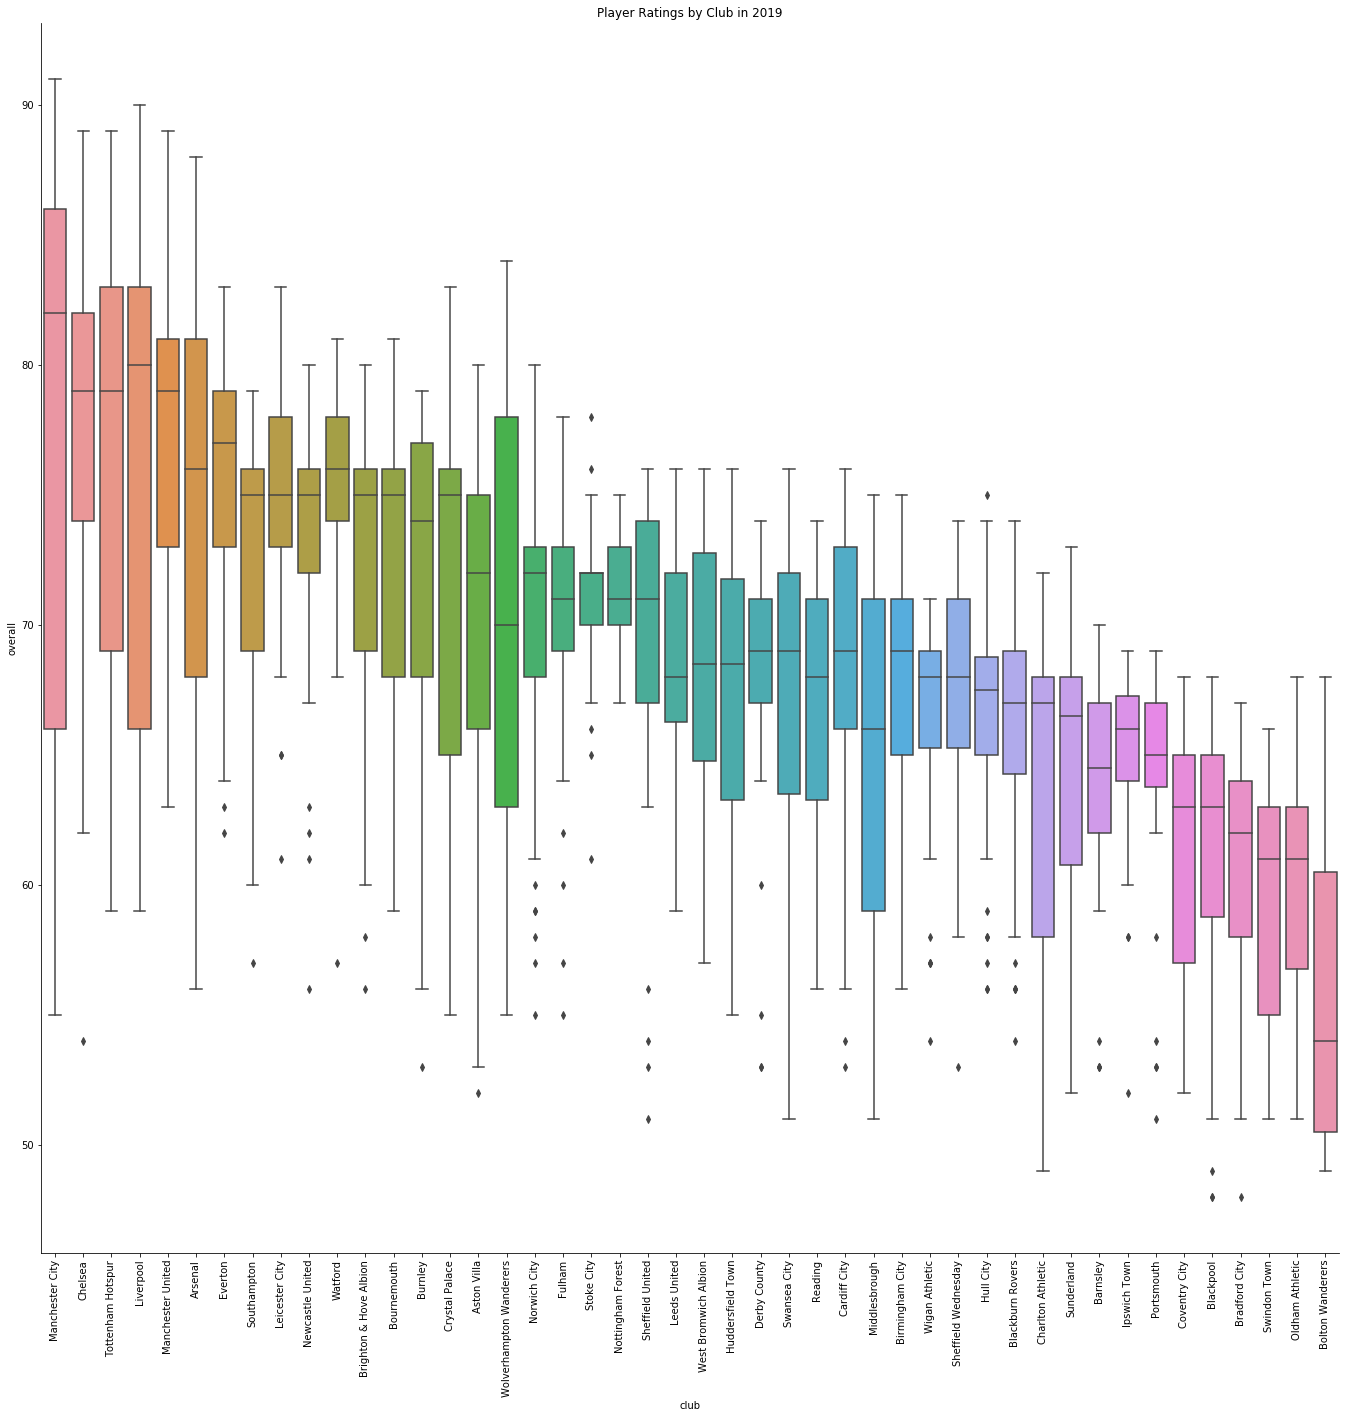

In [166]:
ax=sns.catplot(x="club", y="overall", kind="box", order=order_value, data=df_fifa20_prem)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Player Ratings by Club in 2019')
plt.show()

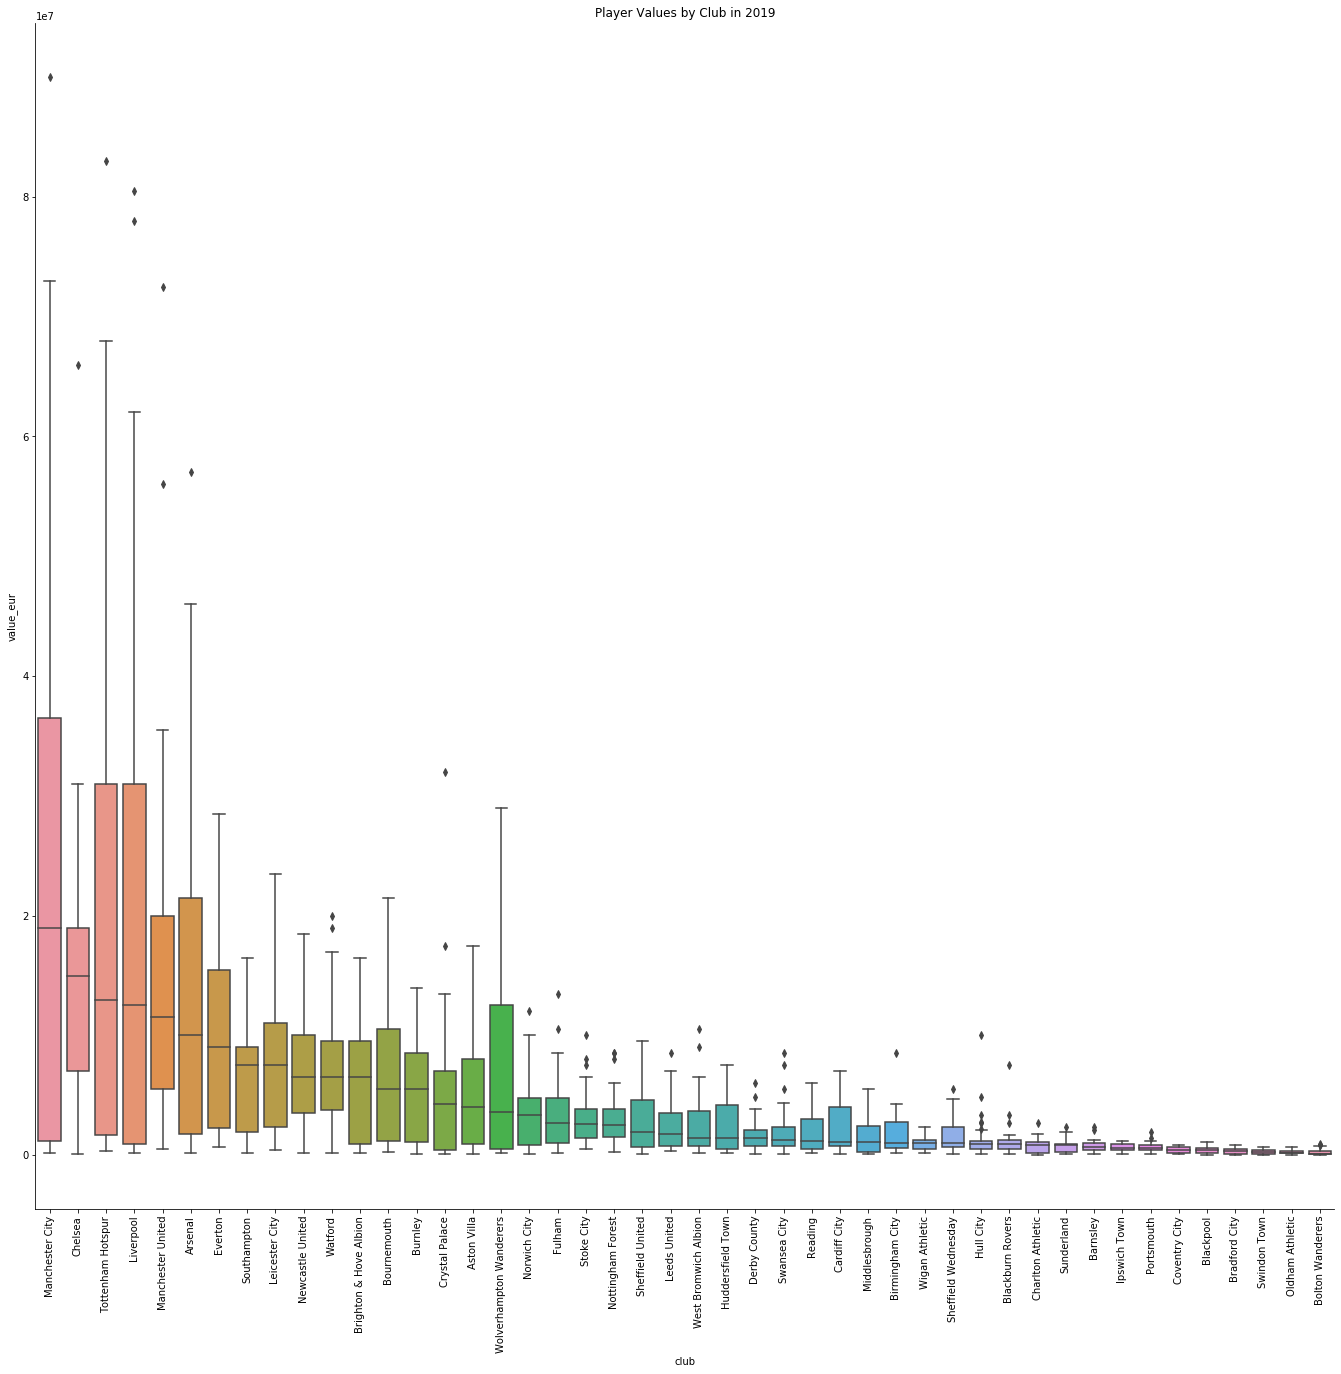

In [165]:
ax=sns.catplot(x="club", y="value_eur", kind="box", order=order_value, data=df_fifa20_prem)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Player Values by Club in 2019')
plt.show()

In [ ]:
df_fifa20['rb']=df_fifa20['rb'].apply(lambda x: str(x).replace('+2', "").replace('+1', "").replace('+3', "").replace('+4', "").replace('+5', "").replace('nan', '0'))

In [43]:

df_fifa20['rb'] = df_fifa20['rb'].dropna().astype(int)

In [51]:
df_fifa20.groupby('club').agg({'rb': np.mean}).sort_values(by='rb')
#age and stat and height against each other will be a nice plot to try
#write for loop to clean up stats
#use kmeans clustering.  .. use this as scouting tool

,rb
club,
Canada,0.000
Austria,0.000
Venezuela,22.000
Côte d'Ivoire,33.286
Millonarios FC,39.000
UCD AFC,39.238
Peru,40.125
Finn Harps,40.480
Bolton Wanderers,41.739


In [23]:
df_fifa20.describe

<bound method NDFrame.describe of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
5         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6         192448  https://sofifa.com/player/192448/marc-andre-te...   
7         203376  https://sofifa.com/player/203376/virgil-van-di...   
8         177003  https://sofifa.com/player/177003/luka-modric/2...   
9         209331  https://sofifa.com/player/209331/mohamed-salah...   
10        231747  https://sofifa.com/player/231747/kylian-mbappe...   
11        201024  https://sofifa.com/player/201024/kalidou-kouli...   
12        202126  https://sofifa.com/player

In [24]:
df_merge = pd.merge(df_fifa20, df_fifa19, open)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat